**Mount Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Step 1
**Transfering Kaggle to colab**
https://www.kaggle.com/general/74235

if you already have data in google drive go to step 2

In [1]:

# installing kaggle
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Uninstalling kaggle-1.5.10:
  Successfully uninstalled kaggle-1.5.10
     |████████████████████████████████| 1.5MB 13.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 4.9 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=0b8044cc943ded916d6bc864c7854198f8700cb2f1e73a3fa8733bc4ee7205bd
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle


In [2]:
# import json file from kaggle
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c petfinder-adoption-prediction

 99% 1.92G/1.94G [00:40<00:00, 53.2MB/s]
100% 1.94G/1.94G [00:40<00:00, 51.7MB/s]


**unzip kaggle data to goole drive**

In [6]:
!unzip petfinder-adoption-prediction.zip -d PetFinder

Streaming output truncated to the last 5000 lines.
  inflating: PetFinder/train_sentiment/a89bfa0aa.json  
  inflating: PetFinder/train_sentiment/a89d4e8f3.json  
  inflating: PetFinder/train_sentiment/a89f8b241.json  
  inflating: PetFinder/train_sentiment/a89fd1f1e.json  
  inflating: PetFinder/train_sentiment/a8a1d4151.json  
  inflating: PetFinder/train_sentiment/a8a2aecc3.json  
  inflating: PetFinder/train_sentiment/a8a3c4f49.json  
  inflating: PetFinder/train_sentiment/a8a8f95f6.json  
  inflating: PetFinder/train_sentiment/a8b358af2.json  
  inflating: PetFinder/train_sentiment/a8b9d57b4.json  
  inflating: PetFinder/train_sentiment/a8ba4dfa1.json  
  inflating: PetFinder/train_sentiment/a8c19a325.json  
  inflating: PetFinder/train_sentiment/a8c336257.json  
  inflating: PetFinder/train_sentiment/a8c555240.json  
  inflating: PetFinder/train_sentiment/a8cdba660.json  
  inflating: PetFinder/train_sentiment/a8ce7d647.json  
  inflating: PetFinder/train_sentiment/a8cfb849e.json

### Step 2
Aftrer you mount google drive

In [21]:
# path to data
PATH ="/content/PetFinder"
OUT_PATH = './'

In [22]:
# show folders and files
import os
print(os.listdir(PATH))

['color_labels.csv', 'train_metadata', 'train_images', 'test_metadata', 'PetFinder-ColorLabels.csv', 'breed_labels.csv', 'test', 'BreedLabels.csv', 'PetFinder-BreedLabels.csv', 'StateLabels.csv', 'test_images', 'PetFinder-StateLabels.csv', 'train', 'test_sentiment', 'ColorLabels.csv', 'state_labels.csv', 'train_sentiment']


In [23]:
# import pandas
import pandas as pd

In [24]:
# load train CSV
trainCSV = pd.read_csv(PATH+'/train/train.csv')
trainCSV.head().T

,0,1,2,3,4
Type,2,2,1,1,1
Name,Nibble,No Name Yet,Brisco,Miko,Hunter
Age,3,1,1,4,1
Breed1,299,265,307,307,307
Breed2,0,0,0,0,0
Gender,1,1,1,2,1
Color1,1,1,2,1,1
Color2,7,2,7,2,0
Color3,0,0,0,0,0
MaturitySize,1,2,2,2,2


In [25]:
# train data frame
trainID = trainCSV[['PetID', 'AdoptionSpeed','Type','Breed1','Breed2','Color1','Color2','Color3']].copy()
trainID.head()

,PetID,AdoptionSpeed,Type,Breed1,Breed2,Color1,Color2,Color3
0,86e1089a3,2,2,299,0,1,7,0
1,6296e909a,0,2,265,0,1,2,0
2,3422e4906,3,1,307,0,2,7,0
3,5842f1ff5,2,1,307,0,1,2,0
4,850a43f90,2,1,307,0,1,0,0


In [26]:
len(trainID.PetID)

14993

In [27]:
# test data frame
testCSV = pd.read_csv(PATH+'/test/test.csv')
testCSV.head().T

,0,1,2,3,4
Type,2,2,2,1,2
Name,Dopey & Grey,Chi Chi,Sticky,Dannie & Kass [In Penang],Cuddles
Age,8,36,2,12,12
Breed1,266,285,265,307,265
Breed2,266,264,0,0,0
Gender,1,2,1,2,1
Color1,2,1,6,2,2
Color2,6,4,7,5,3
Color3,7,7,0,0,7
MaturitySize,1,2,2,2,2


In [28]:
testID = testCSV[['PetID']].copy()
testID.head()

,PetID
0,e2dfc2935
1,f153b465f
2,3c90f3f54
3,e02abc8a3
4,09f0df7d1


## step 3

In [15]:
pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio===0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.2 MB/s eta 0:15:50tcmalloc: large alloc 1147494400 bytes == 0x5605e874c000 @  0x7fea41ea0615 0x5605af47506c 0x5605af554eba 0x5605af477e8d 0x5605af56999d 0x5605af4ebfe9 0x5605af4e6b0e 0x5605af47977a 0x5605af4ebe50 0x5605af4e6b0e 0x5605af47977a 0x5605af4e886a 0x5605af56a7c6 0x5605af4e7ee2 0x5605af56a7c6 0x5605af4e7ee2 0x5605af56a7c6 0x5605af4e7ee2 0x5605af479bd9 0x5605af4bd029 0x5605af4787f2 0x5605af4ebd75 0x5605af4e6b0e 0x5605af47977a 0x5605af4e886a 0x5605af4e6b0e 0x5605af47977a 0x5605af4e7a45 0x5605af47969a 0x5605af4e7c9e 0x5605af4e6b0e
     |█████████████████               | 1055.7 MB 63.2 MB/s eta 0:00:15tcmalloc: large alloc 1434370048 bytes == 0x56062cda2000 @  0x7fea41ea0615 0x5605af47506c 0x5605af554eba 0x5605af477e8d 0x5605af56999d 0x5605af4ebfe9 0x5605af4e6b0e 0x5605af47977a 0x5605af4ebe50 0x5605af4e6b0e 0x5605af47977a 0x5605af4e886a 0x5605af56a7c6 0x5605af4e7

In [ ]:
# !pip install torchtext

In [ ]:
# pip install torchvision==0.1.8

In [ ]:
# !pip install torch==1.8.0


In [ ]:
# pip install fastbook==0.0.7

In [16]:
!pip install fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 17.0 MB/s 
     |████████████████████████████████| 193 kB 32.5 MB/s 
     |████████████████████████████████| 1.2 MB 34.2 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 776.8 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 64.4 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.8.0+cu111
    Uninstalling torch-1.8.0+cu111:
      Successfully uninstalled torch-1.8.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.9.0+cu111
    Uninstalling torchvision-0.9.0+cu111:
      Successfully uninstalled torchvision-0.9.0+cu111
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
ERROR: pip's dependency resolv

In [89]:
from fastai.vision import *
from fastai.metrics import error_rate
# from fastai import *
from fastbook import *

In [30]:
doc(ImageDataLoaders)

In [31]:
# PATH = '/content/gdrive/MyDrive/PetFinder'
# path to image
path_img = PATH + '/train_images'

In [32]:
path_img

'/content/PetFinder/train_images'

In [33]:
# test path to image
path_img = PATH + '/train_images'
fnames = get_image_files(path_img)
fnames[:5]


(#5) [Path('/content/PetFinder/train_images/107d56dc4-5.jpg'),Path('/content/PetFinder/train_images/21ae91701-1.jpg'),Path('/content/PetFinder/train_images/d38fca349-4.jpg'),Path('/content/PetFinder/train_images/a12bb119e-2.jpg'),Path('/content/PetFinder/train_images/69c1801cb-9.jpg')]

In [34]:
len(fnames)

58311

In [ ]:
# res = pat.search("../input/train_images/8e0d65b3e-1.jpg")
# res.group(0), res.group(1), res.group(2), res.group(3)

In [35]:
pat = r"(([\w\.-]+)-(\d+))\.jpg"
pat = re.compile(pat)
pat

re.compile(r'(([\w\.-]+)-(\d+))\.jpg', re.UNICODE)

In [36]:
NewList =  pd.DataFrame(columns=["PetID","AdoptionSpeed","Type","Breed1",'is_valid'])
NewList

,PetID,AdoptionSpeed,Type,Breed1,is_valid


In [37]:
# Loop through every file name, find match in Train Target DataFrame, extract Adoption Speed value, and 
# append new row into NewList DataFrame
for name in fnames:
    #parse file path+name
    res = pat.search(str(name))
    #print("core name: ", res.group(2))      #file_core = res.group(2)
    if ((trainID['PetID']==res.group(2)).values.any()): #if fname core is found in dataframe with PetID,AdoptionTime
            AdoptionSpeed=trainID[trainID['PetID']==res.group(2)].AdoptionSpeed.values[0] #extract Adoption Time
            #copy row into new Data Frame
            Type=trainID[trainID['PetID']==res.group(2)].Type.values[0]
            Breed1=trainID[trainID['PetID']==res.group(2)].Breed1.values[0]
            is_valid = 'False'
            NewList = NewList.append(pd.DataFrame({"PetID":[res.group(1)], "AdoptionSpeed":[AdoptionSpeed],"Type":[Type],"Breed1":[Breed1],"is_valid":[is_valid]  }),ignore_index = True)

In [38]:
NewList

,PetID,AdoptionSpeed,Type,Breed1,is_valid
0,107d56dc4-5,2,1,307,False
1,21ae91701-1,4,1,307,False
2,d38fca349-4,3,1,49,False
3,a12bb119e-2,2,1,307,False
4,69c1801cb-9,3,1,307,False
...,...,...,...,...,...
58306,1d6944a82-1,1,2,266,False
58307,cbc7dc778-2,1,1,307,False
58308,bd0bfa1f6-5,1,2,264,False
58309,b79275092-18,3,2,264,False


In [39]:
newerList = NewList.copy()

In [40]:
newerList.PetID = NewList.PetID.astype(str)+".jpg"

In [41]:
newerList

,PetID,AdoptionSpeed,Type,Breed1,is_valid
0,107d56dc4-5.jpg,2,1,307,False
1,21ae91701-1.jpg,4,1,307,False
2,d38fca349-4.jpg,3,1,49,False
3,a12bb119e-2.jpg,2,1,307,False
4,69c1801cb-9.jpg,3,1,307,False
...,...,...,...,...,...
58306,1d6944a82-1.jpg,1,2,266,False
58307,cbc7dc778-2.jpg,1,1,307,False
58308,bd0bfa1f6-5.jpg,1,2,264,False
58309,b79275092-18.jpg,3,2,264,False


In [42]:
# save data to google drive
newerList.to_csv('newerList.csv')
!cp newerList.csv "/content/drive/MyDrive/PetFolder"

dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

In [70]:
# train for breed
breed_train_data = newerList[['PetID','Breed1']]

In [44]:
# breed_train_data.Breed1 = breed_train_data.Breed1.astype(str)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [71]:
breed_train_data.head()

,PetID,Breed1
0,107d56dc4-5.jpg,307
1,21ae91701-1.jpg,307
2,d38fca349-4.jpg,49
3,a12bb119e-2.jpg,307
4,69c1801cb-9.jpg,307


In [72]:
# drop data with < 5 pictures
df = breed_train_data
counts = df['Breed1'].value_counts()

new_df = df[~df['Breed1'].isin(counts[counts < 5].index)]
new_df

,PetID,Breed1
0,107d56dc4-5.jpg,307
1,21ae91701-1.jpg,307
2,d38fca349-4.jpg,49
3,a12bb119e-2.jpg,307
4,69c1801cb-9.jpg,307
...,...,...
58306,1d6944a82-1.jpg,266
58307,cbc7dc778-2.jpg,307
58308,bd0bfa1f6-5.jpg,264
58309,b79275092-18.jpg,264


In [73]:
type(new_df.Breed1[0])

int

In [85]:
# drop data with breed ID 307
new_clean_df = new_df[new_df.Breed1!=307]
new_clean_df.head()

,PetID,Breed1
2,d38fca349-4.jpg,49
5,cfe66604e-1.jpg,265
6,0d7d16ce1-2.jpg,266
8,3aa622eed-3.jpg,266
10,26716b324-1.jpg,266


In [86]:
len(new_clean_df)

35328

In [ ]:
# breed_train_data.loc[breed_train_data.Breed1 == 257]

,PetID,Breed1
42308,945bf5e17-1.jpg,257


In [95]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

In [117]:
dls =ImageDataLoaders.from_df(new_clean_df, PATH , folder='train_images', label_col='Breed1', valid_pct=0.2, seed=42, item_tfms=Resize(224))
# dls =ImageDataLoaders.from_df(new_df, PATH , folder='train_images', label_col='Breed1', valid_pct=0.2, seed=42, item_tfms=Resize(224), bs=8 )


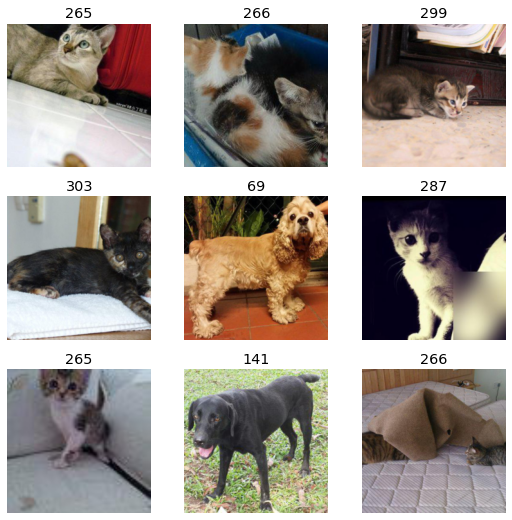

In [118]:
dls.show_batch()

In [119]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.310833,2.263613,0.513659,01:36


epoch,train_loss,valid_loss,error_rate,time
0,1.871885,2.108004,0.506157,01:39
1,1.774040,2.088359,0.510120,01:40
2,1.615201,2.110814,0.515499,01:39
3,1.354420,2.116085,0.527247,01:39
4,1.084910,2.345701,0.569002,01:38
5,0.749307,2.495755,0.606086,01:40
6,0.423158,2.845396,0.556971,01:38
7,0.222478,2.948625,0.571125,01:41
8,0.138066,3.139332,0.534466,01:38
9,0.104815,3.156188,0.535740,01:38


In [122]:
learn.save('/content/drive/MyDrive/PetFolder/Breed_Model')

Path('/content/drive/MyDrive/PetFolder/Breed_Model.pth')

In [123]:
learn.export('/content/drive/MyDrive/PetFolder/BreedModel.pkl')

In [124]:
path = Path("/content/drive/MyDrive/PetFolder")
path.ls(file_exts='.pkl')

(#1) [Path('/content/drive/MyDrive/PetFolder/BreedModel.pkl')]

In [125]:
# load learn
learn_inf = load_learner(path/'BreedModel.pkl')

In [126]:
# upload immage
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [128]:
img = PILImage.create(btn_upload.data[-1])

In [129]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [130]:
pred,pred_idx,probs = learn_inf.predict(img)

In [131]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: 141; Probability: 0.3323')

In [ ]:

# # path = Path('gdrive/MyDrive/petfinder_data/images/')

# dls = ImageDataLoaders.from_df(
#     df, path=path, fn_col=0,
#     label_col=1, item_tfms=Resize(224)

# dls = ImageDataLoaders.from_df(
#     learn_breed, path=PATH, fn_col=0,
#     label_col=1, item_tfms=Resize(224))

In [ ]:
# learn_breed.fine_tune(5, 3e-2)

In [ ]:
PATH

'/content/PetFolder'